# CIFAR-10 Image Classification Project

## Objective
Build an image classification model using traditional machine learning (Logistic Regression) and deep learning (CNN) techniques.

### Tasks:
1. Image Preprocessing (Resize, Normalization)
2. Split dataset into train and test sets
3. Train at least 2 models (CNN and Logistic Regression)
4. Compare model performance


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import cv2
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## 1. Load and Explore Dataset
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

c:\Users\Admin\Desktop\Tasks\task 5\task 5.1\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)


## 2. Preprocessing
### Normalization and Resizing
We will normalize the pixel values to be between 0 and 1.

In [3]:

X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0


X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Preprocessing complete.")

Preprocessing complete.


## 3. Visualization
Display some sample images from the dataset.

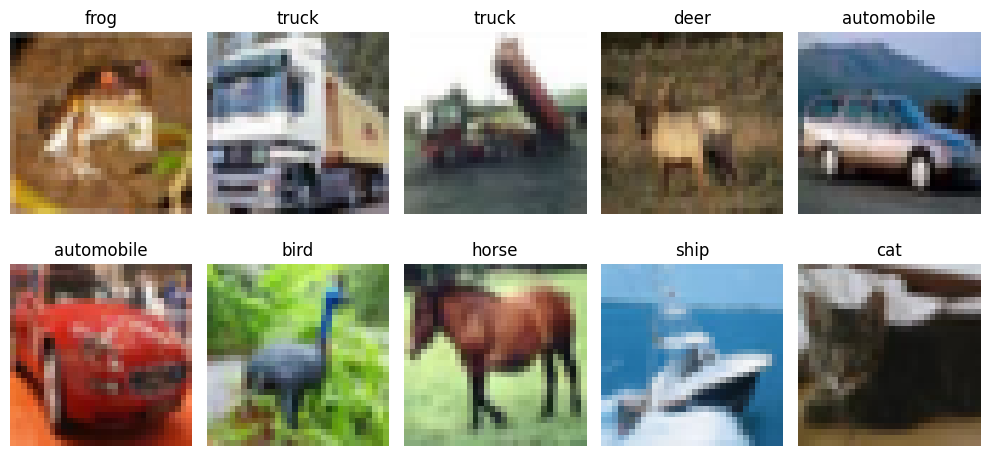

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Model Training
### Model 1: Logistic Regression

In [5]:
print("Training Logistic Regression... (Using a subset for speed)")
lr_model = LogisticRegression(max_iter=100, solver='lbfgs')
lr_model.fit(X_train_flat[:5000], y_train[:5000].ravel())

lr_preds = lr_model.predict(X_test_flat)
lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Training Logistic Regression... (Using a subset for speed)


c:\Users\Admin\Desktop\Tasks\task 5\task 5.1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3517


### Model 2: Convolutional Neural Network (CNN)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN... (5 epochs for demonstration)")
history = cnn_model.fit(X_train_norm, y_train_cat, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

c:\Users\Admin\Desktop\Tasks\task 5\task 5.1\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN... (5 epochs for demonstration)


## 5. Evaluation & Comparison
### Accuracy Comparison

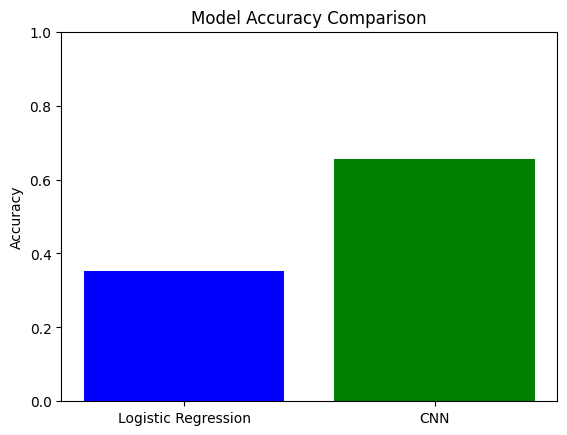

In [ ]:
models = ['Logistic Regression', 'CNN']
accuracies = [lr_acc, cnn_acc]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

### Training vs Validation Accuracy Graph (CNN)

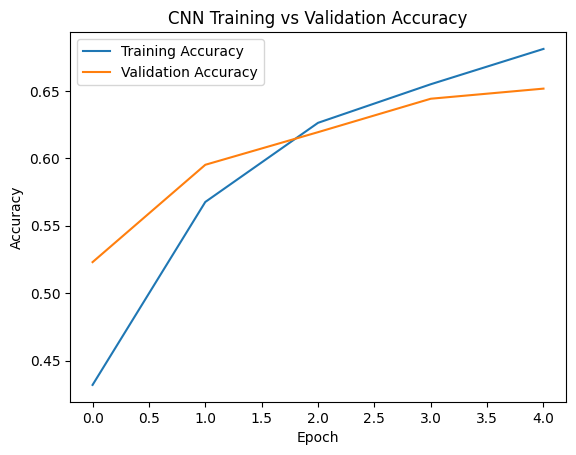

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix (CNN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


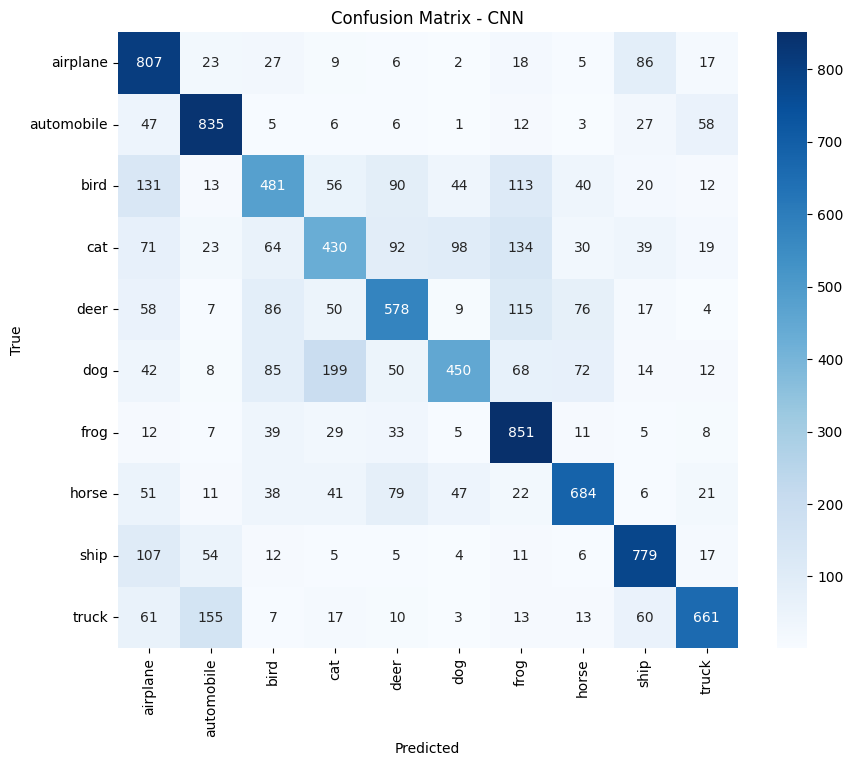

In [ ]:
y_pred_probs = cnn_model.predict(X_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN')
plt.show()